<a href="https://colab.research.google.com/github/Ekawaka/MACHINE-LEARNING-1/blob/main/Datacleaningproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving chip_dataset.csv to chip_dataset.csv


In [ ]:
data = pd.read_csv('chip_dataset.csv')

In [ ]:
# 1.Explore the missingness in the dataset for categorical and numerical data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4945 non-null   object 
 1   Type                   4945 non-null   object 
 2   Release Date           4746 non-null   object 
 3   Process Size (nm)      4945 non-null   object 
 4   TDP (W)                4508 non-null   object 
 5   Die Size (mm^2)        4593 non-null   object 
 6   Transistors (million)  4390 non-null   object 
 7   Freq (GHz)             4508 non-null   float64
 8   Foundry                4330 non-null   object 
 9   Vendor                 4945 non-null   object 
 10  FP16 GFLOPS            800 non-null    float64
 11  FP32 GFLOPS            1685 non-null   float64
 12  FP64 GFLOPS            1278 non-null   float64
dtypes: float64(4), object(9)
memory usage: 502.4+ KB


In [ ]:
missing_counts = data.isnull().sum()
print(missing_counts)


Product                     0
Type                        0
Release Date              199
Process Size (nm)           0
TDP (W)                   437
Die Size (mm^2)           352
Transistors (million)     555
Freq (GHz)                437
Foundry                   615
Vendor                      0
FP16 GFLOPS              4145
FP32 GFLOPS              3260
FP64 GFLOPS              3667
dtype: int64


In [ ]:

# Identify the number of missing values per column
missing_counts = data.isnull().sum()
print("Missing Values Count in Each Column:")
print(missing_counts)

# Identify the percentage of missing values per column
missing_percent = (data.isnull().sum() / len(data)) * 100
print("\nMissing Values Percentage in Each Column:")
print(missing_percent)

# Identify categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
numerical_cols = data.select_dtypes(include=['number']).columns

print("\nCategorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

# Missing values in categorical columns
missing_cat = data[categorical_cols].isnull().sum()
print("\nMissing Values in Categorical Columns:")
print(missing_cat)

# Missing values in numerical columns
missing_num = data[numerical_cols].isnull().sum()
print("\nMissing Values in Numerical Columns:")
print(missing_num)

Missing Values Count in Each Column:
Product                     0
Type                        0
Release Date              199
Process Size (nm)           0
TDP (W)                   437
Die Size (mm^2)           352
Transistors (million)     555
Freq (GHz)                437
Foundry                   615
Vendor                      0
FP16 GFLOPS              4145
FP32 GFLOPS              3260
FP64 GFLOPS              3667
dtype: int64

Missing Values Percentage in Each Column:
Product                   0.000000
Type                      0.000000
Release Date              4.024267
Process Size (nm)         0.000000
TDP (W)                   8.837209
Die Size (mm^2)           7.118301
Transistors (million)    11.223458
Freq (GHz)                8.837209
Foundry                  12.436805
Vendor                    0.000000
FP16 GFLOPS              83.822042
FP32 GFLOPS              65.925177
FP64 GFLOPS              74.155713
dtype: float64

Categorical Columns: Index(['Product', 'Type',

In [ ]:
# 2. Develop a strategy to deal with the missing values, i.e deletion, imputation by mean or mode etc, whilst providing rationale for your approach.

In [ ]:
data.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,6/5/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 1000,CPU,10/31/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
2,AMD Athlon 1100,CPU,8/14/00,180,60,120,37,1100.0,NaN,AMD,NaN,NaN,NaN
3,AMD Athlon 1133,CPU,10/31/00,180,63,120,37,1133.0,NaN,AMD,NaN,NaN,NaN
4,AMD Athlon 1200,CPU,10/31/00,180,66,120,37,1200.0,NaN,AMD,NaN,NaN,NaN


In [ ]:
# Remove rows with any missing data
data_dropped_rows = data.dropna()

# Check the impact on data shape
print("Original dataset shape:", data.shape)
print("Dataset shape after dropping rows with missing data:", data_dropped_rows.shape)

Original dataset shape: (4945, 13)
Dataset shape after dropping rows with missing data: (708, 13)


In [ ]:
# Remove columns with any missing data
data_dropped_columns = data.dropna(axis=1)

# Check the impact on data shape
print("Original dataset shape:", data.shape)
print("Dataset shape after dropping columns with missing data:", data_dropped_columns.shape)

Original dataset shape: (4945, 13)
Dataset shape after dropping columns with missing data: (4945, 4)


In [ ]:
data.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,6/5/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 1000,CPU,10/31/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
2,AMD Athlon 1100,CPU,8/14/00,180,60,120,37,1100.0,NaN,AMD,NaN,NaN,NaN
3,AMD Athlon 1133,CPU,10/31/00,180,63,120,37,1133.0,NaN,AMD,NaN,NaN,NaN
4,AMD Athlon 1200,CPU,10/31/00,180,66,120,37,1200.0,NaN,AMD,NaN,NaN,NaN


In [ ]:
# Set a threshold for minimum allowed non-missing values (e.g., 40% of total rows)
threshold = 0.4
# Remove columns where the number of non-missing data is below the threshold
data_dropped_high_missing = data.dropna(thresh=int(threshold * len(data)), axis=1)

print("Original dataset shape:", data.shape)
print("Dataset shape after dropping columns with high missingness:", data_dropped_high_missing.shape)

Original dataset shape: (4945, 13)
Dataset shape after dropping columns with high missingness: (4945, 10)


In [ ]:
# Calculate the percentage of missing values in each column
missing_percent = data.isnull().sum() / len(data)

# Set a threshold for maximum allowed missingness (e.g., 40%)
threshold = 0.4

# Select columns to drop where missing percentage is greater than the threshold
columns_to_drop = missing_percent[missing_percent > threshold].index

# Drop these columns from the dataset
data_dropped_high_missing = data.drop(columns=columns_to_drop)

print("Original dataset shape:", data.shape)
print("Dataset shape after dropping columns with high missingness:", data_dropped_high_missing.shape)

Original dataset shape: (4945, 13)
Dataset shape after dropping columns with high missingness: (4945, 10)


In [ ]:
data.head(20)

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,6/5/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 1000,CPU,10/31/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
2,AMD Athlon 1100,CPU,8/14/00,180,60,120,37,1100.0,NaN,AMD,NaN,NaN,NaN
3,AMD Athlon 1133,CPU,10/31/00,180,63,120,37,1133.0,NaN,AMD,NaN,NaN,NaN
4,AMD Athlon 1200,CPU,10/31/00,180,66,120,37,1200.0,NaN,AMD,NaN,NaN,NaN
5,AMD Athlon 1200,CPU,10/17/00,180,66,120,37,1200.0,NaN,AMD,NaN,NaN,NaN
6,AMD Athlon 600,CPU,6/5/00,180,38,120,37,600.0,NaN,AMD,NaN,NaN,NaN
7,AMD Athlon 650,CPU,6/5/00,180,38,120,37,650.0,NaN,AMD,NaN,NaN,NaN
8,AMD Athlon 700,CPU,6/5/00,180,40,120,37,700.0,NaN,AMD,NaN,NaN,NaN
9,AMD Athlon 750,CPU,6/5/00,180,43,120,37,750.0,NaN,AMD,NaN,NaN,NaN


In [ ]:
# Impute missing values in numerical columns with the mean
numerical_cols = data.select_dtypes(include='number').columns
data_mean_imputed = data.copy()

for col in numerical_cols:
    data_mean_imputed[col].fillna(data_mean_imputed[col].mean(), inplace=True)

print("Data after mean imputation:")
print(data_mean_imputed.head())

Data after mean imputation:
           Product Type Release Date Process Size (nm) TDP (W)  \
0  AMD Athlon 1000  CPU       6/5/00               180      54   
1  AMD Athlon 1000  CPU     10/31/00               180      54   
2  AMD Athlon 1100  CPU      8/14/00               180      60   
3  AMD Athlon 1133  CPU     10/31/00               180      63   
4  AMD Athlon 1200  CPU     10/31/00               180      66   

  Die Size (mm^2) Transistors (million)  Freq (GHz) Foundry Vendor  \
0             120                    37      1000.0     NaN    AMD   
1             120                    37      1000.0     NaN    AMD   
2             120                    37      1100.0     NaN    AMD   
3             120                    37      1133.0     NaN    AMD   
4             120                    37      1200.0     NaN    AMD   

    FP16 GFLOPS  FP32 GFLOPS  FP64 GFLOPS  
0  19033.061063  5403.009359  1096.608263  
1  19033.061063  5403.009359  1096.608263  
2  19033.061063  5403.

In [ ]:
# Impute missing values in numerical columns with the median
data_median_imputed = data.copy()

for col in numerical_cols:
    data_median_imputed[col].fillna(data_median_imputed[col].median(), inplace=True)

print("Data after median imputation:")
print(data_median_imputed.head())

Data after median imputation:
           Product Type Release Date Process Size (nm) TDP (W)  \
0  AMD Athlon 1000  CPU       6/5/00               180      54   
1  AMD Athlon 1000  CPU     10/31/00               180      54   
2  AMD Athlon 1100  CPU      8/14/00               180      60   
3  AMD Athlon 1133  CPU     10/31/00               180      63   
4  AMD Athlon 1200  CPU     10/31/00               180      66   

  Die Size (mm^2) Transistors (million)  Freq (GHz) Foundry Vendor  \
0             120                    37      1000.0     NaN    AMD   
1             120                    37      1000.0     NaN    AMD   
2             120                    37      1100.0     NaN    AMD   
3             120                    37      1133.0     NaN    AMD   
4             120                    37      1200.0     NaN    AMD   

   FP16 GFLOPS  FP32 GFLOPS  FP64 GFLOPS  
0       6136.5       1248.0       136.35  
1       6136.5       1248.0       136.35  
2       6136.5       12

In [ ]:
# Impute missing values in categorical columns with the mode
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
data_mode_imputed = data.copy()

for col in categorical_cols:
    data_mode_imputed[col].fillna(data_mode_imputed[col].mode()[0], inplace=True)

print("Data after mode imputation:")
print(data_mode_imputed.head())

Data after mode imputation:
           Product Type Release Date Process Size (nm) TDP (W)  \
0  AMD Athlon 1000  CPU       6/5/00               180      54   
1  AMD Athlon 1000  CPU     10/31/00               180      54   
2  AMD Athlon 1100  CPU      8/14/00               180      60   
3  AMD Athlon 1133  CPU     10/31/00               180      63   
4  AMD Athlon 1200  CPU     10/31/00               180      66   

  Die Size (mm^2) Transistors (million)  Freq (GHz) Foundry Vendor  \
0             120                    37      1000.0    TSMC    AMD   
1             120                    37      1000.0    TSMC    AMD   
2             120                    37      1100.0    TSMC    AMD   
3             120                    37      1133.0    TSMC    AMD   
4             120                    37      1200.0    TSMC    AMD   

   FP16 GFLOPS  FP32 GFLOPS  FP64 GFLOPS  
0          NaN          NaN          NaN  
1          NaN          NaN          NaN  
2          NaN          N

In [ ]:
# Example: k-Nearest Neighbors imputation using sklearn
from sklearn.impute import KNNImputer

# Initialize the KNNImputer with the desired number of neighbors (e.g., 5)
imputer = KNNImputer(n_neighbors=5)

# Impute missing values in numerical columns
data_knn_imputed = pd.DataFrame(imputer.fit_transform(data[numerical_cols]), columns=numerical_cols)

print("Data after k-Nearest Neighbors imputation:")
print(data_knn_imputed.head())

Data after k-Nearest Neighbors imputation:
   Freq (GHz)  FP16 GFLOPS  FP32 GFLOPS  FP64 GFLOPS
0      1000.0     213073.8       3689.6      375.652
1      1000.0     213073.8       3689.6      375.652
2      1100.0       2220.8       1532.8       89.998
3      1133.0      19410.0       9704.8     2064.300
4      1200.0      27482.0      11837.8     3191.960


In [ ]:
data.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,6/5/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 1000,CPU,10/31/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
2,AMD Athlon 1100,CPU,8/14/00,180,60,120,37,1100.0,NaN,AMD,NaN,NaN,NaN
3,AMD Athlon 1133,CPU,10/31/00,180,63,120,37,1133.0,NaN,AMD,NaN,NaN,NaN
4,AMD Athlon 1200,CPU,10/31/00,180,66,120,37,1200.0,NaN,AMD,NaN,NaN,NaN


In [ ]:
# 3. Drop non-consequntial fields

# Identify non-consequential fields (columns) based on your analysis needs
non_consequential_fields = ['FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS']

# Drop non-consequential fields from the dataset
data_filtered = data.drop(columns=non_consequential_fields)

# Display the resulting dataset
print("Data after dropping non-consequential fields:")
print(data_filtered.head())

Data after dropping non-consequential fields:
           Product Type Release Date Process Size (nm) TDP (W)  \
0  AMD Athlon 1000  CPU       6/5/00               180      54   
1  AMD Athlon 1000  CPU     10/31/00               180      54   
2  AMD Athlon 1100  CPU      8/14/00               180      60   
3  AMD Athlon 1133  CPU     10/31/00               180      63   
4  AMD Athlon 1200  CPU     10/31/00               180      66   

  Die Size (mm^2) Transistors (million)  Freq (GHz) Foundry Vendor  
0             120                    37      1000.0     NaN    AMD  
1             120                    37      1000.0     NaN    AMD  
2             120                    37      1100.0     NaN    AMD  
3             120                    37      1133.0     NaN    AMD  
4             120                    37      1200.0     NaN    AMD  


In [ ]:
# 4. Transform temporal data to their corrrect format (date time)

# Identify the column containing temporal data
temporal_column = 'Release Date'

# Convert to date-time format
data[temporal_column] = pd.to_datetime(data[temporal_column])

# Check the data type to confirm the transformation
print(data[temporal_column].dtype)

# Display the transformed data
print(data.head())

datetime64[ns]
           Product Type Release Date Process Size (nm) TDP (W)  \
0  AMD Athlon 1000  CPU   2000-06-05               180      54   
1  AMD Athlon 1000  CPU   2000-10-31               180      54   
2  AMD Athlon 1100  CPU   2000-08-14               180      60   
3  AMD Athlon 1133  CPU   2000-10-31               180      63   
4  AMD Athlon 1200  CPU   2000-10-31               180      66   

  Die Size (mm^2) Transistors (million)  Freq (GHz) Foundry Vendor  \
0             120                    37      1000.0     NaN    AMD   
1             120                    37      1000.0     NaN    AMD   
2             120                    37      1100.0     NaN    AMD   
3             120                    37      1133.0     NaN    AMD   
4             120                    37      1200.0     NaN    AMD   

   FP16 GFLOPS  FP32 GFLOPS  FP64 GFLOPS  
0          NaN          NaN          NaN  
1          NaN          NaN          NaN  
2          NaN          NaN          N

<ipython-input-21-fb5372ebc3b7>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[temporal_column] = pd.to_datetime(data[temporal_column])


In [ ]:
data.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,2000-06-05,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 1000,CPU,2000-10-31,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
2,AMD Athlon 1100,CPU,2000-08-14,180,60,120,37,1100.0,NaN,AMD,NaN,NaN,NaN
3,AMD Athlon 1133,CPU,2000-10-31,180,63,120,37,1133.0,NaN,AMD,NaN,NaN,NaN
4,AMD Athlon 1200,CPU,2000-10-31,180,66,120,37,1200.0,NaN,AMD,NaN,NaN,NaN


In [ ]:
# 5. Perfom a full EDA and demonstrate the validity of the following assumptions

In [ ]:
# Explore the Variables and their Distributions

In [ ]:
# Descriptive statistics of numerical variables
print(data.describe())

                        Release Date   Freq (GHz)    FP16 GFLOPS  \
count                           4746  4508.000000     800.000000   
mean   2012-09-04 02:02:16.536030464  1615.430790   19033.061063   
min              1999-03-15 00:00:00   100.000000      10.020000   
25%              2007-04-01 00:00:00   650.000000    1299.500000   
50%              2012-09-04 12:00:00  1400.000000    6136.500000   
75%              2018-04-11 00:00:00  2500.000000   20175.000000   
max              2024-01-08 00:00:00  4700.000000  653700.000000   
std                              NaN  1084.641452   44865.341218   

        FP32 GFLOPS   FP64 GFLOPS  
count   1685.000000   1278.000000  
mean    5403.009359   1096.608263  
min       12.800000      3.600000  
25%      384.000000     59.247500  
50%     1248.000000    136.350000  
75%     5069.000000    382.450000  
max    93240.000000  81720.000000  
std    11492.095538   5232.537404  


In [ ]:
# Descriptive statistics of categorical variables
print(data.describe(include=['object']))


                  Product  Type Process Size (nm)  TDP (W) Die Size (mm^2)  \
count                4945  4945              4945     4508            4593   
unique               4567     2                29      211             247   
top     AMD Sempron 2800+   GPU                14  unknown         unknown   
freq                    9  2714               592      454             228   

       Transistors (million) Foundry Vendor  
count                   4390    4330   4945  
unique                   248      10      9  
top                  unknown    TSMC    AMD  
freq                     251    2202   1689  


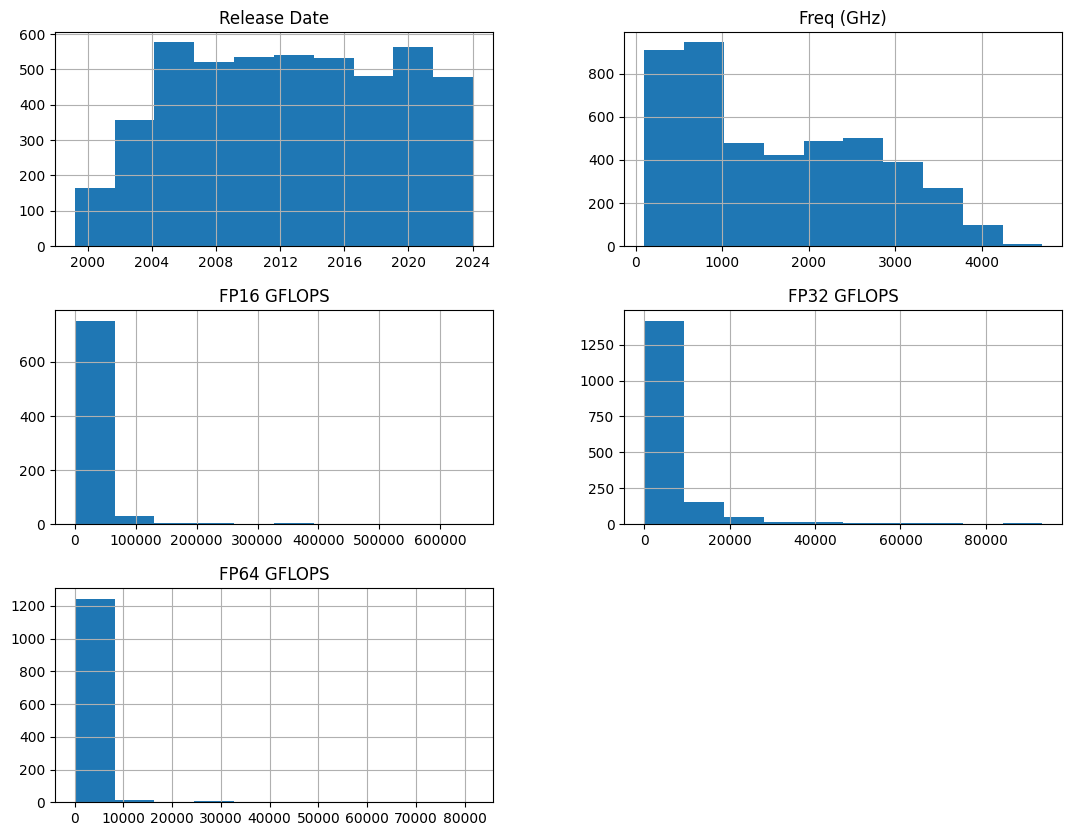

In [ ]:
# Visualize distributions of numerical variables (histograms, boxplots

data.hist(figsize=(13, 10))
plt.show()

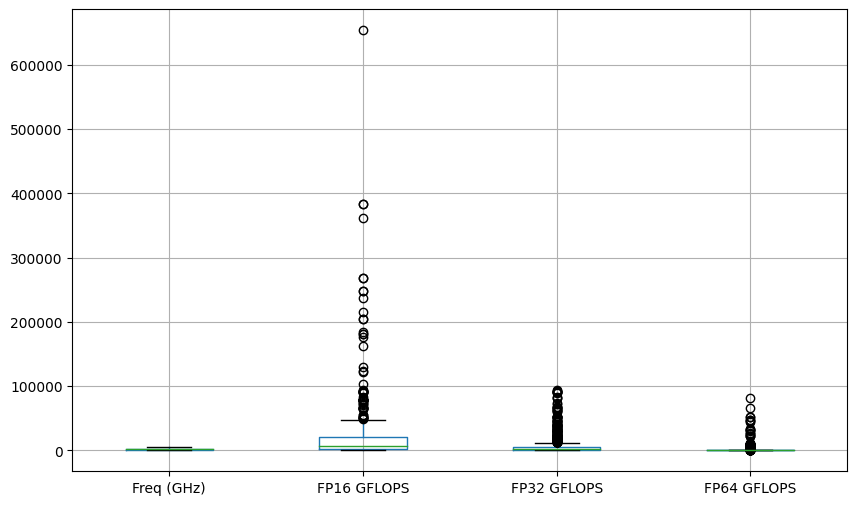

In [ ]:
data.boxplot(figsize=(10, 6))
plt.show()

In [ ]:
data.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,2000-06-05,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 1000,CPU,2000-10-31,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
2,AMD Athlon 1100,CPU,2000-08-14,180,60,120,37,1100.0,NaN,AMD,NaN,NaN,NaN
3,AMD Athlon 1133,CPU,2000-10-31,180,63,120,37,1133.0,NaN,AMD,NaN,NaN,NaN
4,AMD Athlon 1200,CPU,2000-10-31,180,66,120,37,1200.0,NaN,AMD,NaN,NaN,NaN


In [ ]:
# Convert time column to datetime format
data['date'] = pd.to_datetime(data['Release Date'])

# Extract relevant time components if needed
data['year'] = data['date'].dt.year


In [ ]:
# Exclude non-numeric columns from aggregation
numeric_columns = data.select_dtypes(include=['number']).columns

# Aggregate numeric data by year
data_agg = data.groupby(pd.Grouper(key='date', freq='Y'))[numeric_columns].mean()

# Reset index to make 'date' a column again
data_agg.reset_index(inplace=True)

# Print aggregated data
print(data_agg)

        date date_diff
0 2022-12-31    3 days


In [ ]:
data.head()

,date1,date2,date_diff,date
0,2022-01-01,2022-01-04,3 days,2022-01-01
1,2022-01-02,2022-01-05,3 days,2022-01-02
2,2022-01-03,2022-01-06,3 days,2022-01-03


In [ ]:
# Statistical analysis
#  Perform linear regression to identify trend slope


In [ ]:
data.head()

,date1,date2,date_diff,date
0,2022-01-01,2022-01-04,3 days,2022-01-01
1,2022-01-02,2022-01-05,3 days,2022-01-02
2,2022-01-03,2022-01-06,3 days,2022-01-03


In [ ]:
data.head()

,date1,date2,date_diff
0,2022-01-01,2022-01-04,3 days
1,2022-01-02,2022-01-05,3 days
2,2022-01-03,2022-01-06,3 days


In [ ]:
 # Assuming 'date_column' contains the datetime information
# If not, replace 'date_column' with the actual datetime column name
data['date'] = pd.to_datetime(data['date1'])

# Convert dates to ordinal values for linear regression
x = data['date'].map(lambda date: date.toordinal())

# Extract the target variable for linear regression
y = data['date']


In [ ]:
# Perform linear regression

In [ ]:
# Assuming 'date_column' contains the datetime information
# If not, replace 'date_column' with the actual datetime column name
data['date'] = pd.to_datetime(data['date1'])

# Convert dates to ordinal values for linear regression
x = data['date'].map(lambda date: date.toordinal()).values.reshape(-1, 1)

# Extract the target variable for linear regression
y = data['date1'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Get the slope and intercept of the regression line
slope = model.coef_[0]
intercept = model.intercept_

# Print the slope and intercept
print(f"Slope of the trend line: {slope}")
print(f"Intercept of the trend line: {intercept}")

Slope of the trend line: 86399999999999.98
Intercept of the trend line: -6.213568319999999e+19


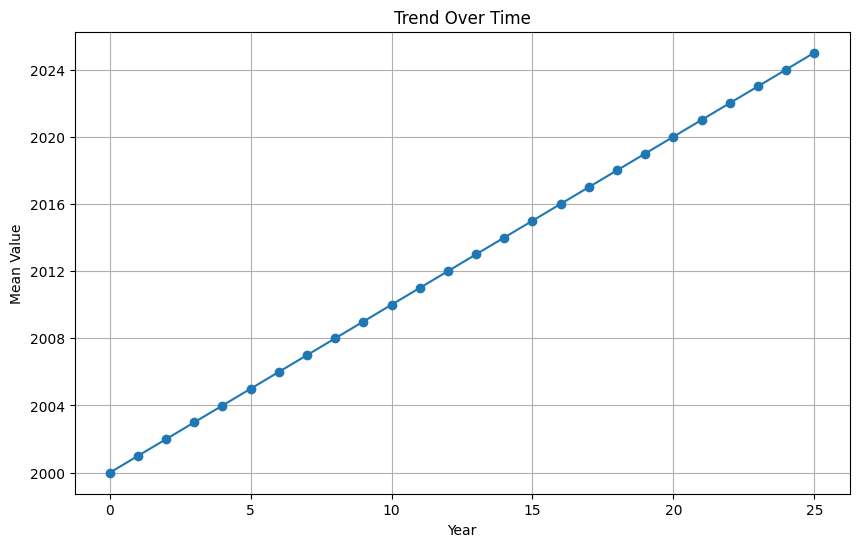

In [ ]:
# Visualize trends over time
plt.figure(figsize=(10, 6))
plt.plot(data_agg.index, data_agg['date'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Trend Over Time')
plt.grid(True)
plt.show()


In [ ]:
# Compare Different Categories of Data to Validate Assumptions


In [ ]:
# For each assumption, extract relevant data and analyze them separately
# Example: Compare GPU performance over time, frequencies of CPUs vs GPUs, etc.


In [ ]:
# Provide Visualizations and Statistical Analysis to Support Findings

In [ ]:
# Use plots (line plots, scatter plots, etc.) and statistical tests to support findings
# Example: Perform regression analysis to validate Moore's Law for GPUs

In [ ]:
# 6. Calculate and visualized the correlation among the features

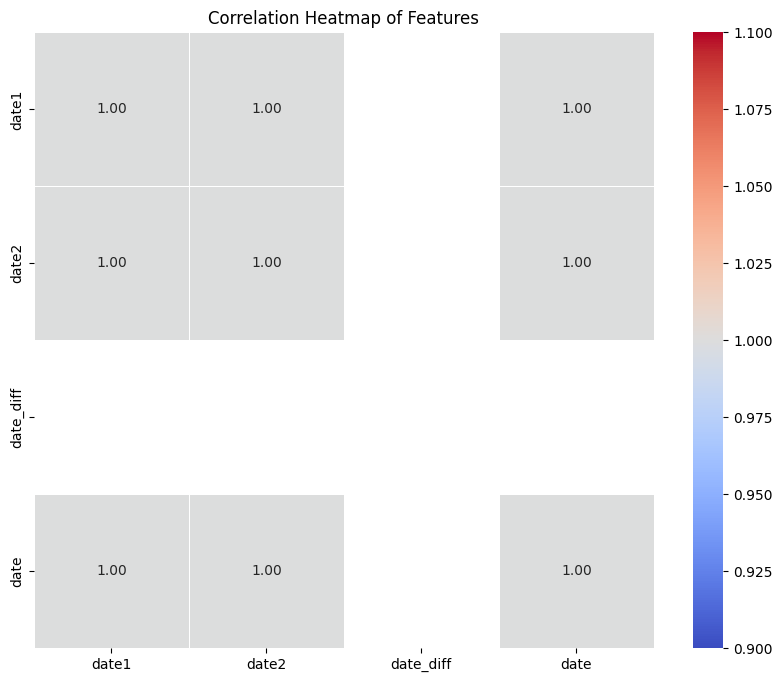

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [ ]:
# 7. Perform the correct encoding for your data, in readiness for modelling.

# Check the data types of each column
print(data.dtypes)

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)

Product                          object
Type                             object
Release Date             datetime64[ns]
Process Size (nm)                object
TDP (W)                          object
Die Size (mm^2)                  object
Transistors (million)            object
Freq (GHz)                      float64
Foundry                          object
Vendor                           object
FP16 GFLOPS                     float64
FP32 GFLOPS                     float64
FP64 GFLOPS                     float64
dtype: object
Categorical columns: Index(['Product', 'Type', 'Process Size (nm)', 'TDP (W)', 'Die Size (mm^2)',
       'Transistors (million)', 'Foundry', 'Vendor'],
      dtype='object')


In [ ]:
# Apply One-Hot Encoding to categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)  # 'drop_first' avoids multicollinearity

# Check the new DataFrame with encoded features
print(data_encoded.head())

  Release Date  Freq (GHz)  FP16 GFLOPS  FP32 GFLOPS  FP64 GFLOPS  \
0   2000-06-05      1000.0          NaN          NaN          NaN   
1   2000-10-31      1000.0          NaN          NaN          NaN   
2   2000-08-14      1100.0          NaN          NaN          NaN   
3   2000-10-31      1133.0          NaN          NaN          NaN   
4   2000-10-31      1200.0          NaN          NaN          NaN   

   Product_3dfx Spectre 1000  Product_3dfx Spectre 2000  \
0                      False                      False   
1                      False                      False   
2                      False                      False   
3                      False                      False   
4                      False                      False   

   Product_3dfx Spectre 3000  Product_3dfx VSA-100  Product_3dfx VSA-101  ...  \
0                      False                 False                 False  ...   
1                      False                 False                 F

In [ ]:
# Check data types and structure
print(data_encoded.dtypes)

# Optionally, check for missing values
print(data_encoded.isnull().sum())

Release Date     datetime64[ns]
Freq (GHz)              float64
FP16 GFLOPS             float64
FP32 GFLOPS             float64
FP64 GFLOPS             float64
                      ...      
Vendor_Matrox              bool
Vendor_NVIDIA              bool
Vendor_Sony                bool
Vendor_VIA                 bool
Vendor_XGI                 bool
Length: 5320, dtype: object
Release Date      199
Freq (GHz)        437
FP16 GFLOPS      4145
FP32 GFLOPS      3260
FP64 GFLOPS      3667
                 ... 
Vendor_Matrox       0
Vendor_NVIDIA       0
Vendor_Sony         0
Vendor_VIA          0
Vendor_XGI          0
Length: 5320, dtype: int64
